#### **Imports**

In [181]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats.distributions import chi2
from matplotlib import pyplot as plt

#### **Read from file**

In [182]:
name_gen = [f"Var{i}" for i in range(8)]

In [183]:
data = pd.read_csv("data10.txt", sep="\t", header=None)
data.columns = name_gen
data

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7
0,8,6,7,5,6,5,8,7
1,7,6,7,5,5,5,8,7
2,6,3,5,4,6,4,7,6
3,8,6,7,7,8,7,8,8
4,9,9,9,8,9,9,10,9
...,...,...,...,...,...,...,...,...
95,8,7,8,6,7,6,8,8
96,10,9,9,9,10,9,10,9
97,8,6,7,6,8,7,8,8
98,9,8,7,8,10,8,9,9


#### **Normalize data**

In [184]:
scaler = StandardScaler().fit(data)
x = pd.DataFrame(scaler.transform(data), columns=name_gen)
x

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7
0,0.322070,0.050415,0.170862,-0.390826,-0.575930,-0.500856,-0.007647,-0.316551
1,-0.409907,0.050415,0.170862,-0.390826,-1.104306,-0.500856,-0.007647,-0.316551
2,-1.141885,-1.209956,-1.094783,-0.885542,-0.575930,-0.987125,-0.772389,-1.128219
3,0.322070,0.050415,0.170862,0.598607,0.480822,0.471680,-0.007647,0.495117
4,1.054047,1.310786,1.436507,1.093323,1.009199,1.444217,1.521836,1.306785
...,...,...,...,...,...,...,...,...
95,0.322070,0.470538,0.803685,0.103890,-0.047554,-0.014588,-0.007647,0.495117
96,1.786025,1.310786,1.436507,1.588039,1.537575,1.444217,1.521836,1.306785
97,0.322070,0.050415,0.170862,0.103890,0.480822,0.471680,-0.007647,0.495117
98,1.054047,0.890662,0.170862,1.093323,1.537575,0.957949,0.757094,1.306785


#### **Check how data is normalized (normalization by columns)**

In [185]:
f"Mean value of first variable is: {x['Var1'].mean():.6f} (other are the same); std is: {x['Var2'].std():.3f}"

'Mean value of first variable is: 0.000000 (other are the same); std is: 1.005'

#### **Find correlation matrix**

In [186]:
#x.transpose().dot(x)/(x.size[0] - 1)

In [187]:
corr_x = x.corr()
corr_x

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7
Var0,1.000000,0.952454,0.885291,0.929782,0.688277,0.912339,0.931687,0.963429
Var1,0.952454,1.000000,0.953813,0.861463,0.546257,0.848551,0.951392,0.940071
Var2,0.885291,0.953813,1.000000,0.739873,0.372587,0.731793,0.886927,0.875914
Var3,0.929782,0.861463,0.739873,1.000000,0.864934,0.978209,0.923920,0.928333
Var4,0.688277,0.546257,0.372587,0.864934,1.000000,0.880585,0.682517,0.709730
Var5,0.912339,0.848551,0.731793,0.978209,0.880585,1.000000,0.922125,0.922900
Var6,0.931687,0.951392,0.886927,0.923920,0.682517,0.922125,1.000000,0.928653
Var7,0.963429,0.940071,0.875914,0.928333,0.709730,0.922900,0.928653,1.000000


#### **Sum squares of upper triangle elements and check if them vary much from singular matrix**

In [188]:
size_of_corr = corr_x.shape[0]
#upper_triangle_filter = [[1 if j > i else 0 for j in range(size_of_corr)] for i in range(size_of_corr)]
np.sum(np.triu(corr_x)**2)-size_of_corr > chi2.ppf(0.995, df=2)

True

#### **Find eigenvectors and eigenvalues**

In [189]:
value, vector = eig(corr_x)
for i in value:
    print(i)
print(f"The vectors are: {vector}")

6.96774100118782
0.8275361847282149
0.08474187024102832
0.04165679125383401
0.028197048683093077
0.013115495836887018
0.017070339303568806
0.019941268765558694
The vectors are: [[-0.37007083  0.0975429   0.46280932 -0.59173631 -0.28843881  0.42734307
   0.15285713  0.00207164]
 [-0.36020589  0.31234574 -0.05833534 -0.19937478  0.20731512 -0.48563787
   0.09133768 -0.66511071]
 [-0.32988339  0.52011933 -0.04174292  0.36218443 -0.59305752 -0.18040007
  -0.22002035  0.23465388]
 [-0.36696781 -0.22944601 -0.03463787 -0.36182359  0.26859695 -0.39711021
  -0.42780145  0.51741486]
 [-0.28946664 -0.70019736  0.0251935   0.20374171 -0.38600807  0.00464298
  -0.27753616 -0.39716145]
 [-0.36525268 -0.25603279 -0.16295988  0.15772819 -0.04700398 -0.18213378
   0.79988692  0.27276805]
 [-0.36819232  0.09907451 -0.70387252 -0.02374906  0.18300768  0.55497294
  -0.12095879 -0.05000304]
 [-0.37019566  0.0641174   0.50678902  0.53014252  0.51503256  0.22383881
  -0.07343468  0.01424541]]


#### **Project data by eigenvectors**

In [190]:
corr_projection = x.dot(vector)
corr_projection

,0,1,2,3,4,5,6,7
0,0.419361,0.736151,0.064589,-0.361314,-0.207329,0.250977,-0.033178,-0.106997
1,0.843191,1.034719,-0.287488,-0.035829,0.207759,-0.064282,0.001577,0.101337
2,2.773839,-0.348403,-0.263272,-0.011986,0.036227,0.144701,-0.118818,0.069332
3,-0.905322,-0.427765,0.309801,0.079687,0.022837,-0.132479,-0.031431,0.262088
4,-3.601047,0.166688,-0.305314,0.329685,-0.096449,-0.000711,0.092135,-0.031210
...,...,...,...,...,...,...,...,...
95,-0.753307,0.640581,0.341943,0.219773,-0.171430,-0.168099,-0.162968,-0.047608
96,-4.206423,-0.245392,0.029627,-0.174800,-0.378658,0.118091,-0.154261,0.016430
97,-0.723777,-0.314254,0.326937,0.258687,-0.110042,0.063977,0.180209,0.006114
98,-2.725965,-0.944056,0.402860,0.004166,0.245999,0.098248,-0.110871,-0.353019


## **Check projection**

#### **Check sum of variety**

In [191]:
#np.var(corr_projection)

In [192]:
np.round(np.sum(np.var(corr_projection)), 8) == np.round(np.sum(np.var(x)), 8)

True

#### **Covariational matrix for projection**

In [193]:
np.round(corr_projection.corr(), 12)

,0,1,2,3,4,5,6,7
0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
1,0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
2,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,0.0
4,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0
7,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0


#### **Get variance from projection**

In [194]:
projection_var = np.var(corr_projection)
projection_var

0    6.967741
1    0.827536
2    0.084742
3    0.041657
4    0.028197
5    0.013115
6    0.017070
7    0.019941
dtype: float64

#### **Find all relative stds from every principal component**

In [195]:
for i, element in enumerate(np.round([variance/np.sum(np.var(corr_projection)) for variance in np.var(corr_projection)], 4)):
    print(f"{i}) {element}")

0) 0.871
1) 0.1034
2) 0.0106
3) 0.0052
4) 0.0035
5) 0.0016
6) 0.0021
7) 0.0025


#### **Find relative std of 2 needed principal components**

In [196]:
N = 2
print(np.round(np.sum(projection_var[0:N])/np.sum(projection_var), 4))

0.9744


In [197]:
min_y_index = np.argmin(corr_projection.iloc[:, 1])
corr_projection.iloc[min_y_index, 0], corr_projection.iloc[min_y_index, 1] 

(2.8062601039660455, -2.561593621991735)

#### **Plot components**

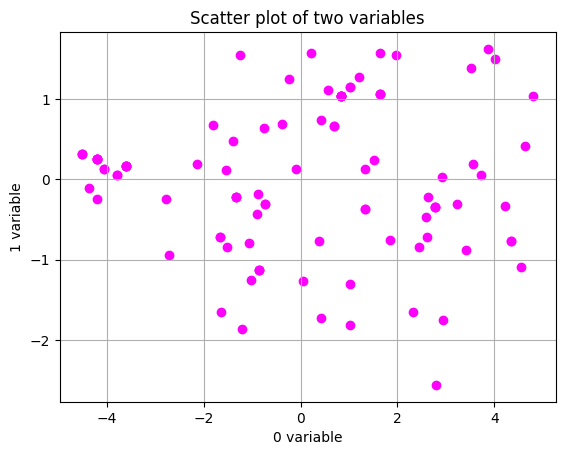

In [198]:
plt.xlabel("0 variable")
plt.ylabel("1 variable")
plt.title("Scatter plot of two variables")
plt.grid()
plt.scatter(corr_projection.iloc[:, 0], corr_projection.iloc[:, 1], c="magenta")

# **Using PCA 'from box'**

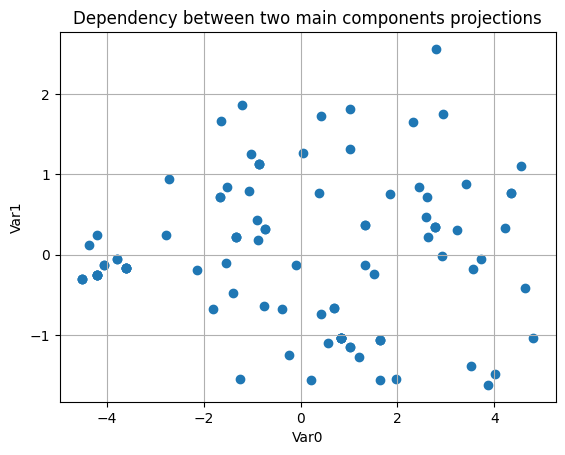

In [199]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

new_scaler = StandardScaler()

new_data = new_scaler.fit_transform(data)

X_vis = pca.fit_transform(new_data)


plt.title("Dependency between two main components projections")
plt.xlabel("Var0")
plt.ylabel("Var1")
plt.grid()
plt.scatter(X_vis[:, 0], X_vis[:, 1])